In [1]:
import numpy as np
import scipy
from scipy import stats, signal
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams["figure.figsize"] = (15,10)

#### Problem 1
Which is more probable when rolling 2 six-sided dice: rolling snake eyes or rolling sevens?

Rolling sevens is more probable because there are six ways to roll a seven and only one way to roll snake eyes. Rolling a seven is six times more likely than rolling a one.

#### Problem 2
Show how to use the convolution operator to determine the probability of the sum of 2 six sided dice.

$$P_{A+B}(x) = \sum_z P_A(z)P_B(x-z)$$

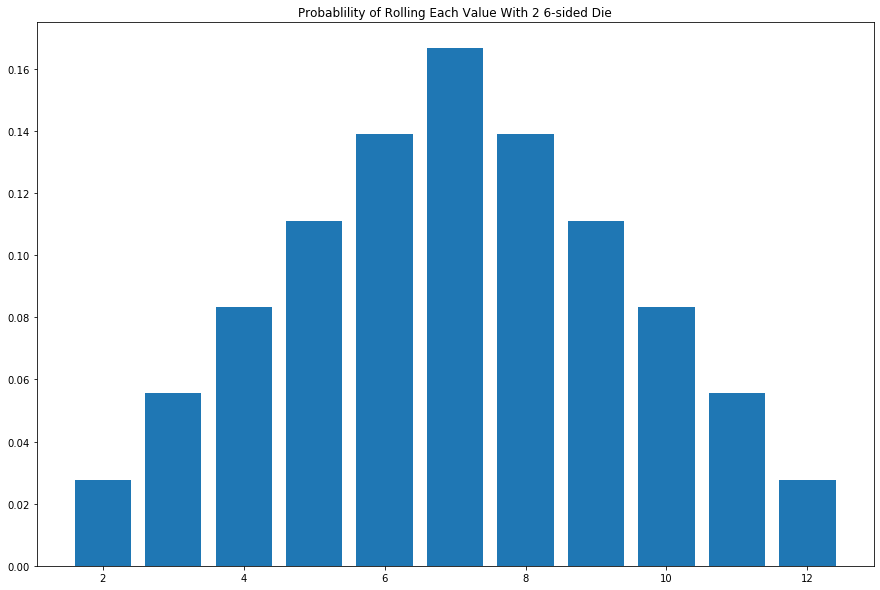

In [2]:
p = scipy.signal.convolve([1/6, 1/6, 1/6, 1/6, 1/6, 1/6],[1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
x = range(2,13)
plt.bar(x,p)
plt.title('Probablility of Rolling Each Value With 2 6-sided Die')
plt.show()

#### Problem 3
Calculate the mean and the variance of the distribution in problem 2.
$$<x> = \sum_x xP(x)$$
$$ <x^2> = \sum_x x^2P(x)$$
$$\sigma^2 = <x^2>-<x>^2$$

In [3]:
ex = sum(p*x)
ex2 = sum(p*np.square(x))
var = ex2 - np.square(ex)
print('Mean:',ex, 'Variance:',np.round(var,3))

Mean: 7.0 Variance: 5.833


#### Problem 4

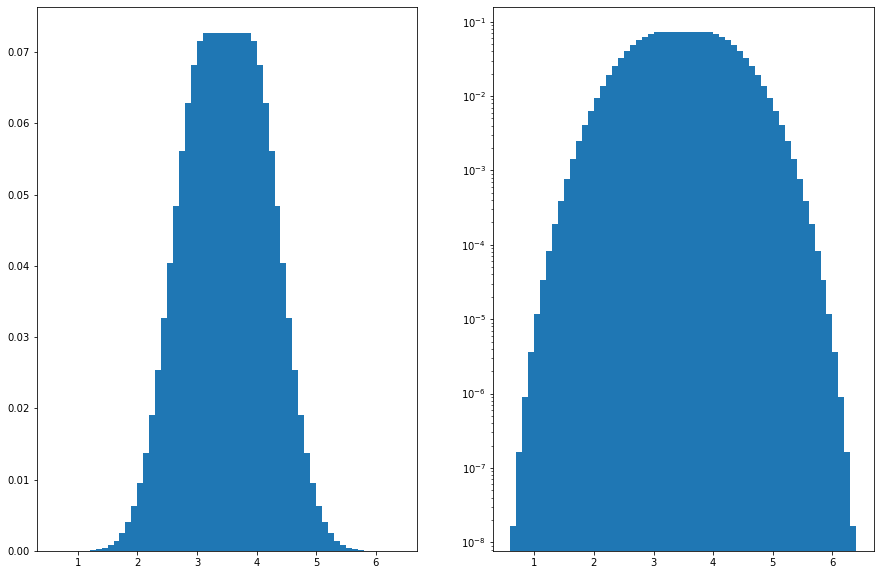

NormaltestResult(statistic=9.359817390079042, pvalue=0.009279861145739853) For the Sample
NormaltestResult(statistic=0.6116915797179173, pvalue=0.736500186496917) For a normal distribution


In [24]:
np.random.seed(1122)
x = np.arange(1, 6.1, 0.1).tolist()
p1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
p = p1
for i in range(1,10):
    p = scipy.signal.convolve(p,p1)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.bar(x,p)
ax2.bar(x,p)
ax2.set_yscale('log')
plt.show()
#Creates a sample from the distribution plotted below
sample = stats.rv_discrete(values = (x, p)).rvs(size = 50000)
normal = stats.norm.rvs(size = 50000)
#Test of the sample for normal distribution
print(stats.normaltest(sample), 'For the Sample')
print(stats.normaltest(normal), 'For a normal distribution')

The normal test is used to test the null hypothesis that the distribution comes from a normal distribution. In this case we assume that the sample comes from a normal distribution, and test the probability of that being true. Say we set the barrier for the p-value at $5\%$. If the p-value is less than this value, we can reject the null hypothesis, and in the case of our distribution this is true. This means that we can say that the sample did not come from a normal distribution. With the sample derived from a normal distribution, the p-value returned was $51.1\%$, this being greater than the threshold does not, however, mean that we can accept the null hypothesis, but rather that we cannot reject it.

#### Problem 5
Show that the sum and average of an initially Gaussian distribution is also a Guassian. How does the standard deviation of the resulting sum or average Guassian change?

In [27]:
scipy.signal.convolve?

Signature: scipy.signal.convolve(in1, in2, mode='full', method='auto')
Docstring:
Convolve two N-dimensional arrays.

Convolve `in1` and `in2`, with the output size determined by the
`mode` argument.

Parameters
----------
in1 : array_like
    First input.
in2 : array_like
    Second input. Should have the same number of dimensions as `in1`.
mode : str {'full', 'valid', 'same'}, optional
    A string indicating the size of the output:

    ``full``
       The output is the full discrete linear convolution
       of the inputs. (Default)
    ``valid``
       The output consists only of those elements that do not
       rely on the zero-padding. In 'valid' mode, either `in1` or `in2`
       must be at least as large as the other in every dimension.
    ``same``
       The output is the same size as `in1`, centered
       with respect to the 'full' output.
method : str {'auto', 'direct', 'fft'}, optional
    A string indicating which method to use to calculate the convolution.

    ``dire